<a href="https://colab.research.google.com/github/mrcrchln/AssetManagement/blob/main/Asset_Management_Algorithmic_Trading_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nova School of Business and Economics**

---


# Asset Management 2022/2023 - T4
### Marc Reichlin


## *1. For this exercise use the file ”Tickers”, which specifies the tickers of the 50 stocks you should use given your assignment number. Retrieve monthly Book-to-Market data and monthly prices for your stocks from 1980. Present annualized performance statistics (average return, volatility, Sharpe ratio, skewness, kurtosis and max drawdown) for your stocks.*

### **Setup Data**

The first time you run the notebook, before running this cell, you should access the following link https://drive.google.com/drive/folders/1kKzxa0I3u4rPnCKiW2xB79Z0ls2k02Jh?usp=sharing and select the "Add Shortcut to Drive". This will add a shortcut to the datasets to your Google Drive.

The following cell will mount the directory into Colab environment, so that it can be accessed as a local file.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Filpath to data
data_16 = "/content/drive/MyDrive/T4/AssetManagement/16_data.csv"

In [3]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

In [4]:
pip install getFamaFrenchFactors

In [5]:
data = pd.read_csv(data_16)
data = data.drop('Unnamed: 0', axis=1)
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%y')
display(data)

,Ticker,Date,Price,bm
0,AAPL,1980-12-31,34.1875,NaN
1,AAPL,1981-01-30,28.3750,NaN
2,AAPL,1981-02-27,26.6250,NaN
3,AAPL,1981-03-31,24.6250,0.071
4,AAPL,1981-04-30,28.5000,0.071
...,...,...,...,...
18901,ZION,2022-08-31,55.0300,0.678
18902,ZION,2022-09-30,50.8600,0.678
18903,ZION,2022-10-31,51.9400,0.678
18904,ZION,2022-11-30,51.8200,0.559


In [6]:
# Show array of our 50 tickers
tickers_count = data['Ticker'].nunique()
tickers_list = data['Ticker'].unique()

print("Number of tickers:", tickers_count)
print("Tickers:", tickers_list)

Number of tickers: 50
Tickers: ['AAPL' 'ADI' 'AFL' 'ALGN' 'AMZN' 'APH' 'ATO' 'ATVI' 'AWK' 'BALL' 'BBWI'
 'CDW' 'CLX' 'CMCSA' 'CME' 'COF' 'CRL' 'CSX' 'CTAS' 'DFS' 'DGX' 'DOW' 'ES'
 'EVRG' 'EW' 'EXR' 'FDX' 'GILD' 'GPN' 'GRMN' 'ICE' 'IT' 'KMI' 'LRCX' 'LUV'
 'MA' 'MAA' 'NI' 'NWSA' 'PEG' 'PEP' 'PH' 'PNC' 'PNW' 'PTC' 'REG' 'ROP'
 'SLB' 'TMUS' 'ZION']


In [7]:
# count missing values
missing_values = data.isnull().sum()
print('Missing values for all columns:')
display(missing_values)

Missing values for all columns:


Ticker       0
Date         0
Price        0
bm        7790
dtype: int64

### Annualized performance statistics

In [8]:
def max_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    cumulative_max = cumulative_returns.cummax()
    drawdown = cumulative_returns / cumulative_max - 1
    return drawdown.min()

In [9]:
def annualized_performance(data):
    stats = []

    for ticker in data['Ticker'].unique():
        ticker_data = data[data['Ticker'] == ticker]
        ticker_returns = ticker_data['Price'].pct_change().dropna()

        # Annualize return
        avg_return = ticker_returns.mean() * 12

        # Annualize volatility
        volatility = ticker_returns.std() * np.sqrt(12)

        # Calculate Sharpe ratio
        sharpe_ratio = avg_return / volatility

        # Calculate skewness and kurtosis
        stock_skewness = skew(ticker_returns)
        stock_kurtosis = kurtosis(ticker_returns)

        # Calculate max drawdown
        max_dd = max_drawdown(ticker_returns)

        stats.append([ticker, avg_return, volatility, sharpe_ratio, stock_skewness, stock_kurtosis, max_dd])

    columns = ['Ticker', 'Average Return', 'Volatility', 'Sharpe Ratio', 'Skewness', 'Kurtosis', 'Max Drawdown']
    return pd.DataFrame(stats, columns=columns)

In [10]:
performance_stats = annualized_performance(data)
display(performance_stats)

,Ticker,Average Return,Volatility,Sharpe Ratio,Skewness,Kurtosis,Max Drawdown
0,AAPL,0.179113,0.490656,0.365047,-0.835165,4.506216,-0.895886
1,ADI,0.138093,0.430739,0.320597,0.420754,3.980717,-0.891256
2,AFL,0.115487,0.354879,0.325426,-1.137837,7.910012,-0.770607
3,ALGN,0.319731,0.639438,0.500019,1.250732,7.308605,-0.823000
4,AMZN,0.294280,0.584565,0.503417,0.058738,7.068604,-0.981416
5,APH,0.245530,0.833224,0.294675,13.724445,248.628236,-0.885246
6,ATO,0.173173,0.611592,0.283152,14.983403,289.180284,-0.907834
7,ATVI,0.166206,0.443548,0.374719,0.027710,3.148292,-0.779873
8,AWK,0.108094,0.271149,0.398650,-2.135935,14.608793,-0.717949
9,BALL,-0.457438,0.441435,-1.036253,-0.225386,-0.940122,-0.341869


## 2. For each stock and each date, build a Momentum indicator which is defined as the cumulated return over the past six months (note that, by construction, during the first six months of the sample it will not be possible to build such momentum indicator). Use the characteristics Book-to-Market and Momentum to build tercile portfolios, called: Value high, Value med and Value low for Value (book-to-market); and MoM high, MoM med and MoM low for Momentum. To construct the six portfolios, at each date and for each one of the two characteristic, split your 50 stocks in three equally weighted groups of similar sizes (example: for momentum in Jan 2000 you may have 16 stocks in the low Momentum group, 15 in the Middle group, 15 in the high Momentum group and 4 stocks with missing observations at this date). Present annualized performance statistics for the 6 portfolios.

In [11]:
import pandas as pd
import numpy as np

# Import data
data = pd.read_csv(data_16)
data = data.drop('Unnamed: 0', axis=1)

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [12]:
# Sort the data by Ticker and Date
data = data.sort_values(by=['Ticker', 'Date'])

# Calculate the 6-months returns (momentum) for each stock
data['Returns'] = data.groupby('Ticker')['Price'].pct_change()
data['Momentum'] = data.groupby('Ticker')['Returns'].rolling(window=6).apply(lambda x: (x + 1).prod() - 1).reset_index(drop=True)

# Display the dataframe with the calculated Momentum indicator
display(data.head(10))

,Ticker,Date,Price,bm,Returns,Momentum
0,AAPL,1980-12-31,34.1875,NaN,NaN,NaN
1,AAPL,1981-01-30,28.3750,NaN,-0.170018,NaN
2,AAPL,1981-02-27,26.6250,NaN,-0.061674,NaN
3,AAPL,1981-03-31,24.6250,0.071,-0.075117,NaN
4,AAPL,1981-04-30,28.5000,0.071,0.157360,NaN
5,AAPL,1981-05-29,33.1875,NaN,0.164474,NaN
6,AAPL,1981-06-30,26.0625,0.111,-0.214689,-0.237660
7,AAPL,1981-07-31,25.0625,0.111,-0.038369,-0.116740
8,AAPL,1981-08-31,20.1875,0.119,-0.194514,-0.241784
9,AAPL,1981-09-30,15.3125,0.119,-0.241486,-0.378173


In [13]:
import numpy as np

# Drop rows with missing Book-to-Market (bm) and Momentum values
data = data.dropna(subset=['bm', 'Momentum'])

# Function to assign tercile groups
def assign_tercile_group(x):
    return pd.qcut(x, 3, labels=['low', 'med', 'high'])

# Rank stocks for each date based on Book-to-Market (Value) and Momentum characteristics
data['Value_rank'] = data.groupby('Date')['bm'].transform(assign_tercile_group)
data['Momentum_rank'] = data.groupby('Date')['Momentum'].transform(assign_tercile_group)

# Create Value portfolios based on the Value tercile groups
value_portfolios = data.groupby(['Date', 'Value_rank']).agg({
    'Ticker': ['count', lambda x: x.tolist()],
    'Price': 'sum',
    'bm': 'mean',
    'Returns': 'mean',
}).reset_index()

# Flatten the MultiIndex columns for Value portfolios
value_portfolios.columns = ['_'.join(col).rstrip('_') for col in value_portfolios.columns]

value_portfolios.rename(columns={
    'Ticker_count': 'Stocks_count',
    'Ticker_<lambda>': 'Tickers',
    'Price_sum': 'Portfolio_value',
    'bm_mean': 'Average_bm',
    'Returns_mean': 'Returns',
}, inplace=True)

# Create Momentum portfolios based on the Momentum tercile groups
momentum_portfolios = data.groupby(['Date', 'Momentum_rank']).agg({
    'Ticker': ['count', lambda x: x.tolist()],
    'Price': 'sum',
    'Momentum': 'mean',
    'Returns': 'mean',
}).reset_index()

# Flatten the MultiIndex columns for Momentum portfolios
momentum_portfolios.columns = ['_'.join(col).rstrip('_') for col in momentum_portfolios.columns]

momentum_portfolios.rename(columns={
    'Ticker_count': 'Stocks_count',
    'Ticker_<lambda>': 'Tickers',
    'Price_sum': 'Portfolio_value',
    'Momentum_mean': 'Average_momentum',
    'Returns_mean': 'Returns',
}, inplace=True)

print("Value Portfolios:")
display(value_portfolios.head(10))

print("\nMomentum Portfolios:")
display(momentum_portfolios.head(10))

Value Portfolios:


,Date,Value_rank,Stocks_count,Ticker_<lambda_0>,Portfolio_value,Average_bm,Returns
0,1980-07-31,low,7,"[ADI, CMCSA, FDX, LUV, PEP, PH, PNC]",239.6250,0.616571,0.199439
1,1980-07-31,med,6,"[AFL, CLX, IT, MA, PTC, ZION]",88.4375,1.278333,0.032399
2,1980-07-31,high,6,"[ATO, AWK, EXR, NI, PEG, ROP]",75.5000,2.656500,0.093338
3,1980-09-30,low,8,"[ADI, CMCSA, FDX, LUV, LUV, PEP, PNC, PTC]",269.1875,0.579750,-0.040432
4,1980-09-30,med,7,"[AFL, APH, CLX, IT, MA, PH, ZION]",102.5000,1.193714,0.004966
5,1980-09-30,high,7,"[ATO, AWK, EXR, NI, PEG, PEG, ROP]",93.6250,2.246571,0.033236
6,1980-10-31,low,7,"[ADI, CMCSA, FDX, LUV, PEP, PNC, PTC]",256.4375,0.519143,0.039428
7,1980-10-31,med,7,"[AFL, APH, APH, CLX, MA, PH, ZION]",104.6250,1.190571,-0.027126
8,1980-10-31,high,7,"[ATO, AWK, EXR, IT, NI, PEG, ROP]",75.5625,2.218000,-0.015717
9,1980-12-31,low,7,"[ADI, CMCSA, FDX, LUV, PEP, PH, PNC]",234.8750,0.512000,-0.010615



Momentum Portfolios:


,Date,Momentum_rank,Stocks_count,Ticker_<lambda_0>,Portfolio_value,Average_momentum,Returns
0,1980-07-31,low,7,"[AFL, CMCSA, EXR, FDX, IT, PTC, ZION]",132.0625,-0.165653,0.105252
1,1980-07-31,med,6,"[AWK, CLX, NI, PEP, PH, PNC]",130.3750,0.006352,0.075670
2,1980-07-31,high,6,"[ADI, ATO, LUV, MA, PEG, ROP]",141.1250,0.284897,0.159950
3,1980-09-30,low,8,"[AFL, AWK, NI, PEG, PEG, PEP, PH, PTC]",139.9375,0.029624,-0.032165
4,1980-09-30,med,7,"[APH, CLX, IT, LUV, LUV, MA, ZION]",119.3750,0.290962,-0.038518
5,1980-09-30,high,7,"[ADI, ATO, CMCSA, EXR, FDX, PNC, ROP]",206.0000,0.568976,0.067271
6,1980-10-31,low,7,"[AFL, AWK, IT, NI, PEG, PH, ZION]",100.6875,-0.048765,-0.031280
7,1980-10-31,med,7,"[APH, APH, CLX, CMCSA, MA, PEP, PTC]",118.8125,0.157931,-0.026506
8,1980-10-31,high,7,"[ADI, ATO, EXR, FDX, LUV, PNC, ROP]",217.1250,0.617458,0.054372
9,1980-12-31,low,7,"[AFL, LUV, NI, PEG, PEG, PNC, PTC]",133.3750,-0.151476,-0.029767


## Adapt function annualized_performance
We adapt the initially created function and added a group_column argument to make it more flexible.
With this new argument, we can group the data by a specific column, and calculate the performance statistics for each group separately.
This is necessary to calculate the performance statistics for the mixed portfolio as a whole, but also for each individual value and momentum portfolio.

In [14]:
def max_drawdown(return_series):
    comp_ret = (return_series + 1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

def annualized_performance2(data, group_column=None):
    stats = []

    if group_column is None:
        group_data = data
        group_returns = data['Returns'].dropna()

        stats.append(['All', group_returns.mean() * 12, group_returns.std() * np.sqrt(12),
                      (group_returns.mean() * 12) / (group_returns.std() * np.sqrt(12)), skew(group_returns),
                      kurtosis(group_returns), max_drawdown(group_returns)])
    else:
        for group in data[group_column].unique():
            group_data = data[data[group_column] == group]
            group_returns = group_data['Returns'].dropna()

            # Annualize return
            avg_return = group_returns.mean() * 12

            # Annualize volatility
            volatility = group_returns.std() * np.sqrt(12)

            # Calculate Sharpe ratio
            sharpe_ratio = avg_return / volatility

            # Calculate skewness and kurtosis
            portfolio_skewness = skew(group_returns)
            portfolio_kurtosis = kurtosis(group_returns)

            # Calculate max drawdown
            max_dd = max_drawdown(group_returns)

            stats.append([group, avg_return, volatility, sharpe_ratio, portfolio_skewness, portfolio_kurtosis, max_dd])

    columns = [group_column or 'All', 'Average Return', 'Volatility', 'Sharpe Ratio', 'Skewness', 'Kurtosis', 'Max Drawdown']
    return pd.DataFrame(stats, columns=columns)

## And we implement the new function...

In [15]:
from scipy.stats import skew, kurtosis

value_annualized_stats = annualized_performance2(value_portfolios, 'Value_rank')
momentum_annualized_stats = annualized_performance2(momentum_portfolios, 'Momentum_rank')

print("Annualized Performance Statistics for Value Portfolios:")
display(value_annualized_stats)
print("\nAnnualized Performance Statistics for Momentum Portfolios:")
display(momentum_annualized_stats)

Annualized Performance Statistics for Value Portfolios:


,Value_rank,Average Return,Volatility,Sharpe Ratio,Skewness,Kurtosis,Max Drawdown
0,low,0.114739,0.221791,0.517328,-0.119345,0.829813,-0.407583
1,med,0.133673,0.210466,0.635130,-0.150365,0.945282,-0.418793
2,high,0.130362,0.188225,0.692586,0.023087,2.105222,-0.532810



Annualized Performance Statistics for Momentum Portfolios:


,Momentum_rank,Average Return,Volatility,Sharpe Ratio,Skewness,Kurtosis,Max Drawdown
0,low,-0.320272,0.235892,-1.357707,-0.120343,1.354926,-0.999978
1,med,0.131519,0.171465,0.767030,-0.381832,1.445145,-0.377441
2,high,0.584485,0.200654,2.912901,0.402172,1.059190,-0.140440


## *3. Build two long-short portfolios for Value and Momentum using the tercile portfolios. Backtest the portfolio and an equal weighed portfolio investing in the 50 stocks. Plot cumulated returns and present annualized performance statistics.*

Annualized Performance Statistics for Long-Short and Equal-Weighted Portfolios:


,Portfolio,Average Return,Volatility,Sharpe Ratio,Skewness,Kurtosis,Max Drawdown
0,Long-Short Value,0.041994,0.586372,0.071616,1.156168,5.766215,-0.994005
1,Long-Short Momentum,-0.000538,1.547661,-0.000348,-0.659393,6.883223,-1.001666
2,Equal-Weighted Portfolio,0.125975,0.175652,0.717188,-0.330757,0.868203,-0.363128


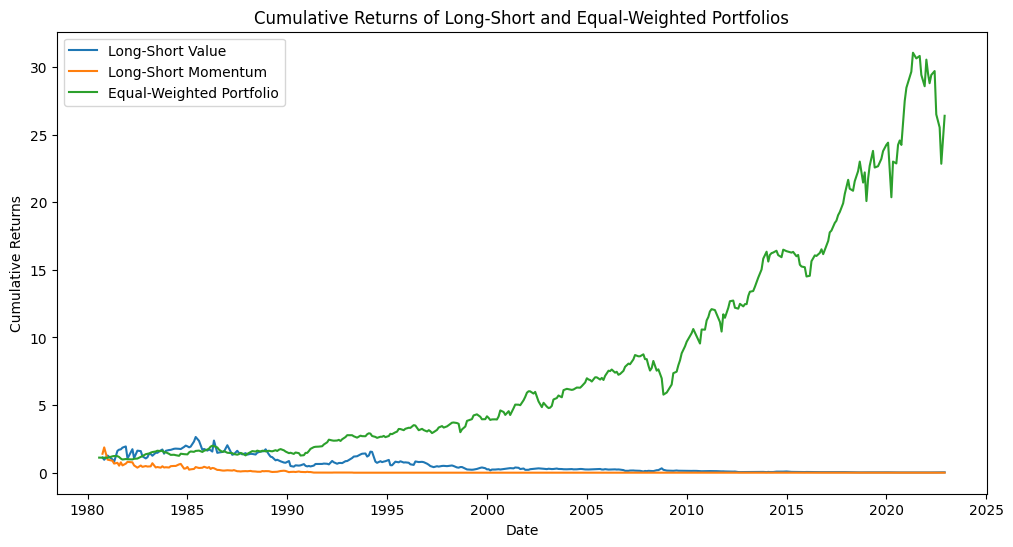

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate the monthly returns for each tercile group within the Value and Momentum portfolios
value_portfolios['Returns'] = value_portfolios.groupby('Value_rank')['Portfolio_value'].pct_change()
momentum_portfolios['Returns'] = momentum_portfolios.groupby('Momentum_rank')['Portfolio_value'].pct_change()

# Create long-short portfolios for Value and Momentum
long_short_value = value_portfolios.pivot_table(index='Date', columns='Value_rank', values='Returns')
long_short_value['long_short'] = long_short_value['high'] - long_short_value['low']

long_short_momentum = momentum_portfolios.pivot_table(index='Date', columns='Momentum_rank', values='Returns')
long_short_momentum['long_short'] = long_short_momentum['high'] - long_short_momentum['low']

# Create dataframes for long-short and equal-weighted portfolios
long_short_value_df = pd.DataFrame({'Date': long_short_value.index, 'Returns': long_short_value['long_short'].values})
long_short_value_df['Portfolio'] = 'Long-Short Value'

long_short_momentum_df = pd.DataFrame({'Date': long_short_momentum.index, 'Returns': long_short_momentum['long_short'].values})
long_short_momentum_df['Portfolio'] = 'Long-Short Momentum'

# Create equal-weighted portfolio
equal_weighted_returns = data.groupby('Date')['Returns'].mean()

equal_weighted_df = pd.DataFrame({'Date': equal_weighted_returns.index, 'Returns': equal_weighted_returns.values})
equal_weighted_df['Portfolio'] = 'Equal-Weighted Portfolio'

# Combine the long-short and equal-weighted portfolios
combined_df = pd.concat([long_short_value_df, long_short_momentum_df, equal_weighted_df], ignore_index=True)

# Calculate annualized performance statistics
all_annualized_stats = annualized_performance2(combined_df, 'Portfolio')

# Display annualized performance statistics
print("Annualized Performance Statistics for Long-Short and Equal-Weighted Portfolios:")
display(all_annualized_stats)

# Calculate cumulative returns
cum_ret_value = np.cumprod(1 + long_short_value['long_short'])
cum_ret_momentum = np.cumprod(1 + long_short_momentum['long_short'])
cum_ret_equal_weighted = np.cumprod(1 + equal_weighted_returns)

# Plot cumulated returns
plt.figure(figsize=(12, 6))
plt.plot(cum_ret_value, label="Long-Short Value")
plt.plot(cum_ret_momentum, label="Long-Short Momentum")
plt.plot(cum_ret_equal_weighted, label="Equal-Weighted Portfolio")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Cumulative Returns of Long-Short and Equal-Weighted Portfolios")
plt.show()

## Just for a even more clear visualization, 'Long-Short value' & 'Long-Short Momentum' only

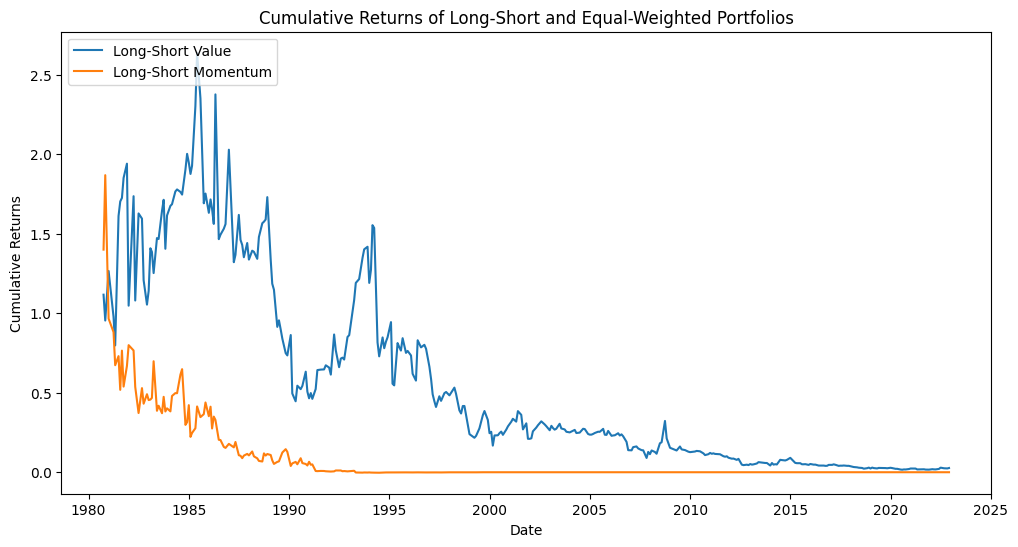

In [17]:
# Plot cumulated returns
plt.figure(figsize=(12, 6))
plt.plot(cum_ret_value, label="Long-Short Value")
plt.plot(cum_ret_momentum, label="Long-Short Momentum")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Cumulative Returns of Long-Short and Equal-Weighted Portfolios")
plt.show()

## 4. Naturally, neither Value nor Momentum is the perfect predictor of returns. To combine the information that each characteristic contains, construct a composite characteristics. To this end, standardize in each month each characteristic to have a cross-sectional mean (standard deviation) of zero (one) and combine them into a single characteristic Sit defined as:
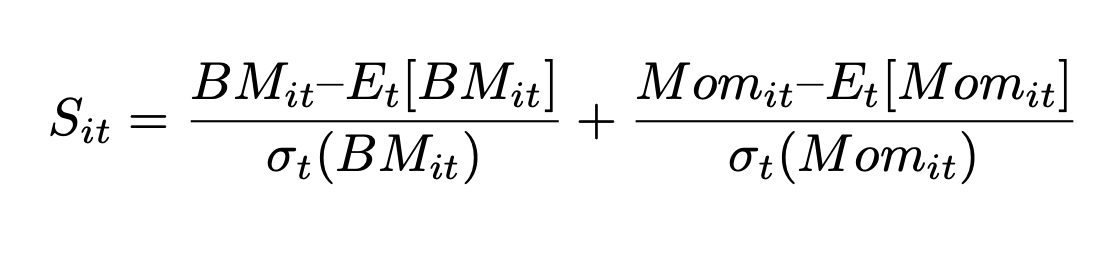

## where the Mean and Standard deviation are taken over all stocks in the cross-section of month t. Now, sort the stocks on the composite characteristic and construct the long-short portfolio using tercile portfolios on this charateristics .Backtest this long-short portfolio. Plot cumulated returns and present annualized performance statistics for this long-short portfolio.

In [18]:
# Create a new value dataframe with only the 'Date' column
NEW_value_portfolios = pd.DataFrame({'Date': data['Date']})

# Calculate mean and standard deviation for value characteristic
NEW_value_portfolios['Value_mean'] = data.groupby('Date')['bm'].transform('mean')
NEW_value_portfolios['Value_std'] = data.groupby('Date')['bm'].transform('std')

# Calculate standardized values for value characteristic
NEW_value_portfolios['Value_standardized'] = (data['bm'] - NEW_value_portfolios['Value_mean']) / NEW_value_portfolios['Value_std']

# Create a new momentum dataframe with only the 'Date' column
NEW_momentum_portfolios = pd.DataFrame({'Date': data['Date']})

# Calculate mean and standard deviation for momentum characteristic
NEW_momentum_portfolios['Momentum_mean'] = data.groupby('Date')['Momentum'].transform('mean')
NEW_momentum_portfolios['Momentum_std'] = data.groupby('Date')['Momentum'].transform('std')

# Calculate standardized values for momentum characteristic
NEW_momentum_portfolios['Momentum_standardized'] = (data['Momentum'] - NEW_momentum_portfolios['Momentum_mean']) / NEW_momentum_portfolios['Momentum_std']

Annualized Performance Statistics for Long-Short and Equal-Weighted Portfolios:


,Portfolio,Average Return,Volatility,Sharpe Ratio,Skewness,Kurtosis,Max Drawdown
0,Long-Short Value,0.041994,0.586372,0.071616,1.156168,5.766215,-0.994005
1,Long-Short Momentum,-0.000538,1.547661,-0.000348,-0.659393,6.883223,-1.001666
2,Long-Short Composite,1.401521,8.769722,0.159814,16.125327,288.872278,-2.049576
3,Equal-Weighted Portfolio,0.125975,0.175652,0.717188,-0.330757,0.868203,-0.363128


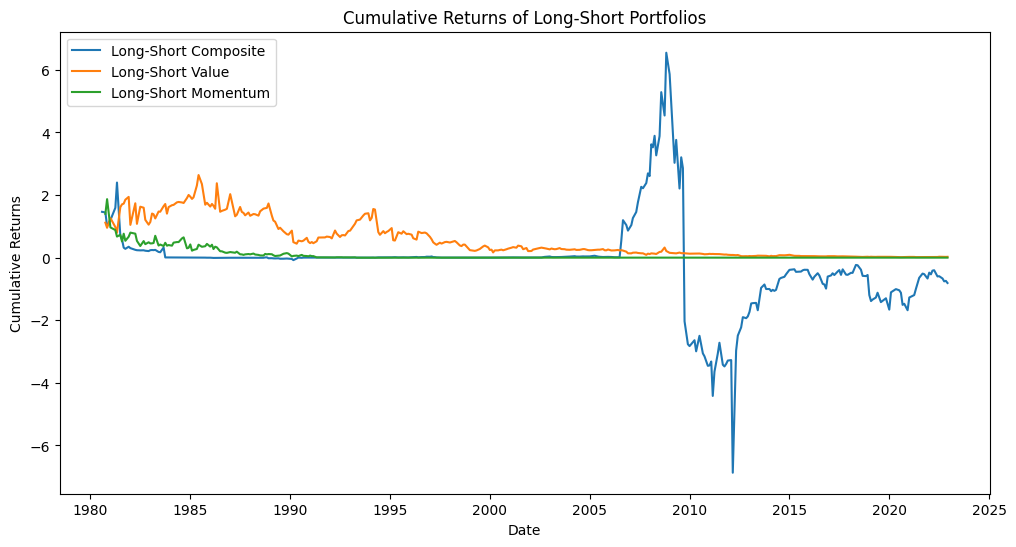

In [19]:
# Calculate the composite characteristic
composite_characteristic = (NEW_value_portfolios['Value_standardized'] + NEW_momentum_portfolios['Momentum_standardized']) / 2

# Sort stocks based on the composite characteristic and assign tercile ranks
composite_portfolios = pd.DataFrame({'Date': NEW_value_portfolios['Date'], 'Composite': composite_characteristic})
composite_portfolios['Composite_rank'] = composite_portfolios.groupby('Date')['Composite'].transform(lambda x: pd.qcut(x, q=3, labels=False))

# Calculate the monthly returns for each tercile group within the composite portfolio
composite_portfolios['Returns'] = composite_portfolios.groupby('Composite_rank')['Composite'].pct_change()

# Create long-short portfolio for the composite characteristic
long_short_composite = composite_portfolios.pivot_table(index='Date', columns='Composite_rank', values='Returns')
long_short_composite['long_short'] = long_short_composite[2] - long_short_composite[0]

# Create dataframe for the long-short portfolio
long_short_composite_df = pd.DataFrame({'Date': long_short_composite.index, 'Returns': long_short_composite['long_short'].values})
long_short_composite_df['Portfolio'] = 'Long-Short Composite'

# Combine the long-short composite portfolio with previous portfolios
combined_df = pd.concat([long_short_value_df, long_short_momentum_df, long_short_composite_df, equal_weighted_df], ignore_index=True)

# Calculate annualized performance statistics
all_annualized_stats = annualized_performance2(combined_df, 'Portfolio')

# Display annualized performance statistics
print("Annualized Performance Statistics for Long-Short and Equal-Weighted Portfolios:")
display(all_annualized_stats)

# Calculate cumulative returns
cum_ret_composite = np.cumprod(1 + long_short_composite['long_short'])

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cum_ret_composite, label="Long-Short Composite")
plt.plot(cum_ret_value, label="Long-Short Value")
plt.plot(cum_ret_momentum, label="Long-Short Momentum")
#plt.plot(cum_ret_equal_weighted, label="Equal-Weighted Portfolio")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Cumulative Returns of Long-Short Portfolios")
plt.show()

In [20]:
combined_df

,Date,Returns,Portfolio
0,1980-09-30,0.116696,Long-Short Value
1,1980-10-31,-0.145559,Long-Short Value
2,1980-12-31,0.326434,Long-Short Value
3,1981-03-31,-0.227855,Long-Short Value
4,1981-04-30,-0.183839,Long-Short Value
...,...,...,...
1421,2022-06-30,-0.107900,Equal-Weighted Portfolio
1422,2022-08-31,-0.036533,Equal-Weighted Portfolio
1423,2022-09-30,-0.105135,Equal-Weighted Portfolio
1424,2022-10-31,0.081173,Equal-Weighted Portfolio


## 5. Discuss how the performance of the strategy at the previous point compares to a mixed strategy that simply invests 50% in the the value long-short portfolio and %50 in the momentum longshort portfolio.

Annualized Performance Statistics for Mixed Portfolio:


,Portfolio,Average Return,Volatility,Sharpe Ratio,Skewness,Kurtosis,Max Drawdown
0,Mixed portfolio,0.020728,0.782278,0.026497,-0.628005,5.861071,-1.000069


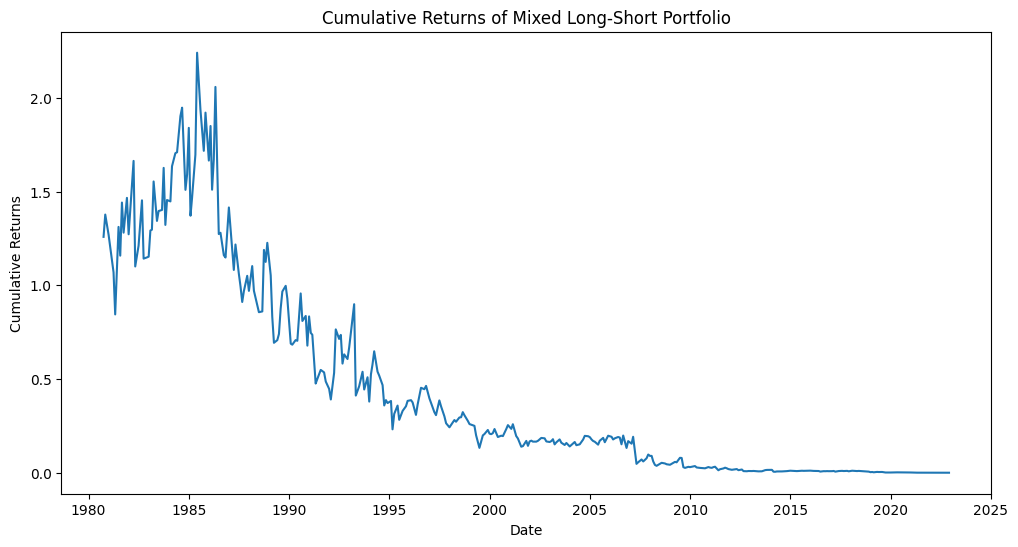

In [21]:
# Combine value and momentum long-short portfolios with equal weighting
mixed_returns = 0.5 * long_short_value['long_short'] + 0.5 * long_short_momentum['long_short']
mixed_returns.name = 'Mixed portfolio'

# Calculate cumulative returns
cumulative_returns = (1 + mixed_returns).cumprod()

# Calculate annualized performance statistics for mixed portfolio
mixed_annualized_stats = annualized_performance2(pd.DataFrame({'Returns': mixed_returns}), group_column=None)

# Rename the 'All' column to 'Mixed portfolio'
mixed_annualized_stats = mixed_annualized_stats.rename(columns={'All': 'Portfolio'})
mixed_annualized_stats = mixed_annualized_stats.replace({'All': 'Mixed portfolio'})

# Print annualized performance statistics for mixed portfolio
print("Annualized Performance Statistics for Mixed Portfolio:")
display(mixed_annualized_stats)

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns)
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Cumulative Returns of Mixed Long-Short Portfolio")
plt.show()

By observing the graph, one can see that the mixed portfolio has a cumulative return between the ones of the value portfolio and the momentum one. Between 1980 and 2023, the overall trend is negative on the three strategies - long-short value, long-short momentum and mixed portfolio. The latter has a positive trend until 1985 (when the peak was reached), given that the long-short value portfolio has a positive performance too (even though the long-short momentum performs poorly from the beginning).

Hence, it is appropriate to say that the good performance of value dominates the negative effect that derives from the momentum performance. From 1985 onwards, the mixed strategy underperforms, which is understandable given the negative trend of the two long-short portfolios.

Analyzing the performance statistics of the three portfolios, we can observe that the average return of 0.020728 is basically the average between the two returns of the two strategies, and the same happens with the volatility and drawdown statistics.

Additionally, the Sharpe Ratio of the mixed strategy has a very low value. Although the long-short value and the long-short momentum achieved ratios of roughly 0.072 and 0, the mixed one reached a disappointing 0.026. The skewness (-0.63) ended up being very close to the one of the momentum portfolio (-0.66), while the kurtosis (5.86) ended up  being very similar to the one of the value portfolio (5.77).

## 6. Consider the long-short portfolios on Value, Momentum, the mixed characteristics and the equally weighted portfolio. Run performance analysis of this strategies against FF5M model. Comment on the alphas, the factor exposures and the R2 of the factor regressions.

In [22]:
import getFamaFrenchFactors as gff
import statsmodels.api as sm
import pandas as pd

In [23]:
#Use the getFamaFrenchFactors python library to get FFM factors data
ff5fm = pd.DataFrame(gff.famaFrench5Factor(frequency="m"))
ff5fm.rename(columns = {'date_ff_factors': 'Date'}, inplace=True)
ff5fm.set_index('Date', inplace=True)
ff5fm.index = ff5fm.index.to_period('M')

In [24]:
# Use dataframe with the four portfolios (Long-short Value, Long-short Momentum, Equal weighted, and mix-characteristic S) created in exercise 4 and pivot table
portfolios = pd.pivot_table(combined_df, values='Returns', index='Date', columns="Portfolio")
portfolios = portfolios.sort_index(ascending=True)

In [25]:
#Create a performance_df dataframe with the four portfolios and the ff5
ff5fm_copy = ff5fm.copy()
ff5fm_copy.index = pd.to_datetime(ff5fm_copy.index.to_timestamp())
portfolios_copy = portfolios.copy()
portfolios_copy.index = pd.to_datetime(portfolios_copy.index)
ff5fm_copy.index = ff5fm_copy.index.to_period('M')
portfolios_copy.index = portfolios_copy.index.to_period('M')
performance_dataframe = pd.merge_asof(ff5fm_copy, portfolios_copy, left_index=True, right_index=True)
performance_dataframe = performance_dataframe.loc['1980-08':'2022-12']

In [26]:
#Calculate excess returns
for portfolio in ["Equal-Weighted Portfolio", "Long-Short Composite", "Long-Short Momentum", "Long-Short Value"]:
  performance_dataframe[portfolio + " - xr"] = performance_dataframe[portfolio] - performance_dataframe["RF"]

performance_dataframe

,Mkt-RF,SMB,HML,RMW,CMA,RF,Equal-Weighted Portfolio,Long-Short Composite,Long-Short Momentum,Long-Short Value,Equal-Weighted Portfolio - xr,Long-Short Composite - xr,Long-Short Momentum - xr,Long-Short Value - xr
Date,,,,,,,,,,,,,,
1980-08,0.0180,0.0425,-0.0260,0.0206,-0.0086,0.0064,0.113184,0.463757,NaN,NaN,0.106784,0.457357,NaN,NaN
1980-09,0.0219,0.0067,-0.0459,0.0191,-0.0276,0.0075,-0.002547,-0.013717,0.400068,0.116696,-0.010047,-0.021217,0.392568,0.109196
1980-10,0.0106,0.0233,-0.0276,0.0165,-0.0115,0.0095,-0.001138,-0.304494,0.334487,-0.145559,-0.010638,-0.313994,0.324987,-0.155059
1980-11,0.0959,-0.0331,-0.0833,0.0450,-0.0566,0.0096,-0.001138,-0.304494,0.334487,-0.145559,-0.010738,-0.314094,0.324887,-0.155159
1980-12,-0.0452,-0.0029,0.0279,-0.0129,0.0124,0.0131,-0.007603,0.194372,-0.482962,0.326434,-0.020703,0.181272,-0.496062,0.313334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08,-0.0377,0.0152,0.0029,-0.0475,0.0129,0.0019,-0.036533,0.124860,0.381944,-0.135843,-0.038433,0.122960,0.380044,-0.137743
2022-09,-0.0935,-0.0105,0.0005,-0.0151,-0.0080,0.0019,-0.105135,0.136764,0.011424,-0.016639,-0.107035,0.134864,0.009524,-0.018539
2022-10,0.0783,0.0189,0.0801,0.0334,0.0664,0.0023,0.081173,-0.019851,0.447562,-0.021563,0.078873,-0.022151,0.445262,-0.023863


In [27]:
#Handle missing values, as the OLS function can't handle them
performance_dataframe.dropna(inplace=True)

In [28]:
#Create the regression models
#Define explanatory variables
x = performance_dataframe[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
X1 = sm.add_constant(x)

#Long-short value portfolio
y = performance_dataframe['Long-Short Value - xr']
model_LSV = sm.OLS(y, X1)
results_LSV = model_LSV.fit()
parameter_LSV = results_LSV.params

#Long-short momentum portfolio
y = performance_dataframe['Long-Short Momentum - xr']
model_LSM = sm.OLS(y, X1)
results_LSM = model_LSM.fit()
parameter_LSM = results_LSM.params

#Equal-weighted portfolio
y = performance_dataframe['Equal-Weighted Portfolio - xr']
model_EW = sm.OLS(y, X1)
results_EW = model_EW.fit()
parameter_EW = results_EW.params

#Long-short composite portfolio
y = performance_dataframe['Long-Short Composite - xr']
model_LSC = sm.OLS(y, X1)
results_LSC = model_LSC.fit()
parameter_LSC = results_LSC.params

In [29]:
#Summary of Long-Short Value portfolio regression on FF5FM
results_LSV.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Long-Short Value - xr   R-squared:                       0.035
Model:                               OLS   Adj. R-squared:                  0.025
Method:                    Least Squares   F-statistic:                     3.613
Date:                   Tue, 05 Sep 2023   Prob (F-statistic):            0.00321
Time:                           12:33:30   Log-Likelihood:                 203.89
No. Observations:                    508   AIC:                            -395.8
Df Residuals:                        502   BIC:                            -370.4
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0019      0.008     -0.254      0.799      -0.017       0.013
Mkt-RF        -0.1408      0.178     -0.790      0.430      -0.491       0.209
SMB            0.3848      0.279      1.379      0.169      -0.164       0.933
HML            0.9824      0.320      3.068      0.002       0.353       1.612
RMW            0.5768      0.344      1.676      0.094      -0.099       1.253
CMA           -0.7099      0.497     -1.429      0.154      -1.686       0.266
==============================================================================
Omnibus:                      112.169   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              553.532
Skew:                           0.872   Prob(JB):                    6.34e-121
Kurtosis:                       7.808   Cond. No.                         76.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression of the long-short portfolio on Value against the Fama French 5 Factor Model (FF5FM) shows that this strategy has an alpha of -0.0019, a  negative beta on the market factor (Mkt-RF) of -0.1421, a positive beta on the SMB factor of 0.3841, a positive beta on the HML factor of 0.9879, a positive beta on the RMW factor of 0.5635, and a negative beta on the CMA factor of -0.7158. The model also has an R^2 of 0.035 which indicates that the model explains only 3.5% of the variation in the Long-Short Value portfolio returns.
Moreover, the alpha is not statistically significant (p-value of 0.805), and neither is the coefficients on the market (Mkt-RF). The coeficcient on the size (SML) factor is statistically significant at the 20% level, leading to the interpretation that due to its positive coefficient, the Long-Short Value portfolio is more exposed to the returns of small-cap as opposed to large-cap stocks. The coeficcient on the value (HML) factor is statistically significant at the 1% level, leading to the interpretation that due to its positive coefficient, the Long-Short Value portfolio is more exposed to the returns of value (high book-to-market) stocks than growth (low book-to-market) stocks. The model also exhibits a statistically significant positive coefficient on the RMW factor, at the 10% level, meaning the returns of the portfolio are more exposed to robust operating profitability stocks. The negative coefficient on the CMA factor is statistically significant at the 15% level, meaning the portfolio in more exposed to stocks of aggressive investment firms than convervative ones.


In [30]:
#Summary of Long-Short Momentum portfolio regression on FF5FM
results_LSM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Long-Short Momentum - xr   R-squared:                       0.032
Model:                                  OLS   Adj. R-squared:                  0.022
Method:                       Least Squares   F-statistic:                     3.317
Date:                      Tue, 05 Sep 2023   Prob (F-statistic):            0.00588
Time:                              12:33:30   Log-Likelihood:                -266.88
No. Observations:                       508   AIC:                             545.8
Df Residuals:                           502   BIC:                             571.1
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0094      0.019      0.486      0.627      -0.029       0.047
Mkt-RF        -0.3168      0.450     -0.704      0.482      -1.201       0.568
SMB           -1.6407      0.705     -2.326      0.020      -3.026      -0.255
HML           -1.0441      0.809     -1.291      0.197      -2.633       0.545
RMW           -0.8283      0.869     -0.953      0.341      -2.536       0.880
CMA           -1.6451      1.255     -1.311      0.190      -4.110       0.820
==============================================================================
Omnibus:                       95.738   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              809.059
Skew:                          -0.536   Prob(JB):                    2.07e-176
Kurtosis:                       9.089   Cond. No.                         76.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression of the long-short portfolio on Momentum against the Fama French 5 Factor Model (FF5FM) shows that this strategy has an alpha of 0.0094, a  negative beta on the market factor (Mkt-RF) of -0.3183, a negative beta on the SMB factor of -1.6434, a negative beta on the HML factor of -1.0553, a negative beta on the RMW factor of -0.8387, and a negative beta on the CMA factor of -1.6381. The model also has a R^2 of 0.032 which indicates that the model explains only 3.2% of the variation in the Long-Short Momentum portfolio returns.
Moreover, the alpha is not statistically significant (p-value of 0.625), and neither is the coefficients on the market (Mkt-RF) and RMW factors. The coeficcient on the size (SML) factor is statistically significant at the 5% level, leading to the interpretation that due to its negative coefficient, the Long-Short Momentum portfolio is more exposed to the returns of large-cap as opposed to small-cap stocks. The coeficcient on the value (HML) factor is statistically significant at the 20% level, leading to the interpretation that due to its negative coefficient, the Long-Short Value portfolio is more exposed to the returns of growth (low book-to-market) stocks. The negative coefficient on the CMA factor is statistically significant at the 20% level, meaning the portfolio in more exposed to stocks of aggressive investment firms than convervative ones.


In [31]:
#Summary of Equal-weighted portfolio regression on FF5FM
results_EW.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Equal-Weighted Portfolio - xr   R-squared:                       0.397
Model:                                       OLS   Adj. R-squared:                  0.391
Method:                            Least Squares   F-statistic:                     66.05
Date:                           Tue, 05 Sep 2023   Prob (F-statistic):           5.93e-53
Time:                                   12:33:30   Log-Likelihood:                 923.06
No. Observations:                            508   AIC:                            -1834.
Df Residuals:                                502   BIC:                            -1809.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.002      1.251      0.212      -0.001       0.006
Mkt-RF         0.6718      0.043     15.527      0.000       0.587       0.757
SMB            0.2894      0.068      4.270      0.000       0.156       0.423
HML            0.0965      0.078      1.241      0.215      -0.056       0.249
RMW            0.0827      0.084      0.990      0.323      -0.081       0.247
CMA            0.0291      0.121      0.241      0.809      -0.208       0.266
==============================================================================
Omnibus:                       36.447   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.556
Skew:                          -0.202   Prob(JB):                     3.30e-28
Kurtosis:                       5.412   Cond. No.                         76.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression of the equal-weighted portfolio against the Fama French 5 Factor Model (FF5FM) shows that this strategy has an alpha of 0.0023, a positive beta on the market factor (Mkt-RF) of 0.6718, a positive beta on the SMB factor of 0.2897, a positive beta on the HML factor of 0.0971, a positive beta on the RMW factor of 0.0834, and a negative beta on the CMA factor of 0.0283. The model also has a R^2 of 0.397 which indicates that the model explains almost 40% of the variation in the Equal-Weighted portfolio returns.
Moreover, the alpha is statistically significant (p-value of 0.212) at the 25% level, meaning that investing in the EW portfolio will return a positive average excess return of 0.0023 over the benchmark. The coeficcient on the market is statistically significant at the 1% level, leading to the interpretation that due to its positive coefficient, the EW portfolio is positively exposed to the market excess returns. The coeficcient on the size (SML) factor is statistically significant at the 1% level, leading to the interpretation that due to its positive coefficient, the EW portfolio is more exposed to the returns of small-cap as opposed to large-cap stocks. The coeficcient on the value (HML) factor is statistically significant at the 25% level, leading to the interpretation that due to its positive coefficient, the EW portfolio is more exposed to the returns of value (high book-to-market) stocks than growth (low book-to-market) stocks. The coefficients on the RMW and CMA factors are not statistically significant.

In [32]:
#Summary of Long-Short Composite portfolio regression on FF5FM
results_LSC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Long-Short Composite - xr   R-squared:                       0.006
Model:                                   OLS   Adj. R-squared:                 -0.004
Method:                        Least Squares   F-statistic:                    0.6023
Date:                       Tue, 05 Sep 2023   Prob (F-statistic):              0.698
Time:                               12:33:30   Log-Likelihood:                -1107.1
No. Observations:                        508   AIC:                             2226.
Df Residuals:                            502   BIC:                             2252.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0753      0.101      0.746      0.456      -0.123       0.274
Mkt-RF        -1.7984      2.354     -0.764      0.445      -6.423       2.826
SMB           -3.0446      3.687     -0.826      0.409     -10.289       4.199
HML            5.1527      4.229      1.218      0.224      -3.156      13.462
RMW           -1.6686      4.544     -0.367      0.714     -10.597       7.260
CMA           -4.5395      6.560     -0.692      0.489     -17.429       8.350
==============================================================================
Omnibus:                     1154.242   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3277188.329
Skew:                          18.478   Prob(JB):                         0.00
Kurtosis:                     394.742   Cond. No.                         76.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression of the long-short composite portfolio, the mix-characteristic S portfolio, against the Fama French 5 Factor Model (FF5FM) shows that this strategy has an alpha of 0.0755, a  negative beta on the market factor (Mkt-RF) of -1.8038, a negative beta on the SMB factor of -3.0589, a positive beta on the HML factor of 5.1782, a negative beta on the RMW factor of -1.7094, and a negative beta on the CMA factor of -4.5671. The model also has a R^2 of 0.006 meaning that the model explains less than 1% of the variation of the Long-Short Composite returns.
Moreover, the vast majority of the coefficients do not seem to have statistical significance, meaning that the exposure of the portfolio returns to the FF5M. Nonetheless, the  positive coefficient on the value (HML) factor is statistically significant at the 25% level, which signifies that this portfolio is more exposed to value (high book-to-market) stocks.

## 7. Is the performance analysis (α) driven mostly by one of the two legs (long ot short)? Discuss the implications for trading on long-only versus long-short tercile portfolios.

In [33]:
import statsmodels.api as sm

# Calculate alpha and Sharpe ratio for long_short_value['high']
returns_high_value = long_short_value['high'].dropna()
risk_free_rate = 0.05  # Assuming a risk-free rate of 5%

# Calculate excess returns
excess_returns_high_value = returns_high_value - risk_free_rate
excess_returns_high_value = excess_returns_high_value.astype(float)  # Convert to float for regression

# Calculate alpha using regression
X_high_value = sm.add_constant(np.arange(len(excess_returns_high_value)))
model_high_value = sm.OLS(excess_returns_high_value.values, X_high_value)
results_high_value = model_high_value.fit()
alpha_high_value = results_high_value.params[0]

# Calculate annualized Sharpe ratio
sharpe_ratio_high_value = np.mean(excess_returns_high_value) / np.std(excess_returns_high_value) * np.sqrt(252)

print("Alpha (long_short_value['high']):", alpha_high_value)
print("Sharpe Ratio (long_short_value['high']):", sharpe_ratio_high_value)

# Calculate alpha and Sharpe ratio for long_short_value['low']
returns_low_value = long_short_value['low'].dropna()

# Calculate excess returns
excess_returns_low_value = returns_low_value - risk_free_rate
excess_returns_low_value = excess_returns_low_value.astype(float)  # Convert to float for regression

# Calculate alpha using regression
X_low_value = sm.add_constant(np.arange(len(excess_returns_low_value)))
model_low_value = sm.OLS(excess_returns_low_value.values, X_low_value)
results_low_value = model_low_value.fit()
alpha_low_value = results_low_value.params[0]

# Calculate annualized Sharpe ratio
sharpe_ratio_low_value = np.mean(excess_returns_low_value) / np.std(excess_returns_low_value) * np.sqrt(252)

print("Alpha (long_short_value['low']):", alpha_low_value)
print("Sharpe Ratio (long_short_value['low']):", sharpe_ratio_low_value)

print()

# Calculate alpha and Sharpe ratio for long_short_momentum['high']
returns_high_momentum = long_short_momentum['high'].dropna()

# Calculate excess returns
excess_returns_high_momentum = returns_high_momentum - risk_free_rate
excess_returns_high_momentum = excess_returns_high_momentum.astype(float)  # Convert to float for regression

# Calculate alpha using regression
X_high_momentum = sm.add_constant(np.arange(len(excess_returns_high_momentum)))
model_high_momentum = sm.OLS(excess_returns_high_momentum.values, X_high_momentum)
results_high_momentum = model_high_momentum.fit()
alpha_high_momentum = results_high_momentum.params[0]

# Calculate annualized Sharpe ratio
sharpe_ratio_high_momentum = np.mean(excess_returns_high_momentum) / np.std(excess_returns_high_momentum) * np.sqrt(252)

print("Alpha (long_short_momentum['high']):", alpha_high_momentum)
print("Sharpe Ratio (long_short_momentum['high']):", sharpe_ratio_high_momentum)

# Calculate alpha and Sharpe ratio for long_short_momentum['low']
returns_low_momentum = long_short_momentum['low'].dropna()

# Calculate excess returns
excess_returns_low_momentum = returns_low_momentum - risk_free_rate
excess_returns_low_momentum = excess_returns_low_momentum.astype(float)  # Convert to float for regression

# Calculate alpha using regression
X_low_momentum = sm.add_constant(np.arange(len(excess_returns_low_momentum)))
model_low_momentum = sm.OLS(excess_returns_low_momentum.values, X_low_momentum)
results_low_momentum = model_low_momentum.fit()
alpha_low_momentum = results_low_momentum.params[0]

# Calculate annualized Sharpe ratio
sharpe_ratio_low_momentum = np.mean(excess_returns_low_momentum) / np.std(excess_returns_low_momentum) * np.sqrt(252)

print("Alpha (long_short_momentum['low']):", alpha_low_momentum)
print("Sharpe Ratio (long_short_momentum['low']):", sharpe_ratio_low_momentum)

Alpha (long_short_value['high']): -0.022629158401630864
Sharpe Ratio (long_short_value['high']): -3.6256485125236977
Alpha (long_short_value['low']): -0.041620943576916494
Sharpe Ratio (long_short_value['low']): -5.283954325045456

Alpha (long_short_momentum['high']): -0.03717906851874548
Sharpe Ratio (long_short_momentum['high']): -0.4729834775297282
Alpha (long_short_momentum['low']): -0.0466655094482613
Sharpe Ratio (long_short_momentum['low']): -0.4295897097063347


To begin with, alpha measures the risk-adjusted return of a portfolio relative to its benchmark, and it is influenced by the performance of both the long and short positions. A positive alpha indicates that a portfolio performs better than a specific benchmark and vice versa.

As one can view above, the alphas generated in our regressions are both negative and positive. For example, from question 6), we can see that a long-short value strategy yielded an alpha of -0.0019, indicating that its alpha is influenced by the performance of both the long and short positions; however, it our case its the market is outperforming the portfolio. On the other hand, a long-short momentum strategy yielded an alpha of 0.0094, it has the same reasoning as mention before the only diference is that in this case the portfolio is outperforming the market. This indicates that combining both short and long will yield excess return in the momentum strategy. In contrast, the long-short value strategies do not yield excess returns.

Furthermore, looking further into the alphas, it can tell us more about whether a portfolio's long or short leg will drive the alpha. In this question, we analyzed the long and short legs individually and noticed that our alphas were negative. Accordingly, the long leg's alpha in value and momentum strategies are -0.0226 and -0.0372, respectively. The short leg's alpha in value and momentum strategies are -0.0412 and -0.0467, respectively. Since we have a positive alpha for our long-short momentum strategy, these findings suggest that long positions mostly drive this performance analysis. Looking at the long and the short leg values individually, we can confirm that the long leg in value strategy performs better than the short leg. Thus, it is reasonable to reaffirm that the long leg is driving the performance analysis. It is noticeable that the short legs yield terrible alphas and Sharpe ratios, and this can be explained by the fact that short selling is extremely risky because there are no limits on how much one can lose. On the other hand, in long-only strategies, one will never lose more than the amount of invested capital.

Based on our values, we see that combing both long and short trading will yield higher alphas. This implies that trading on long-only strategies will make the trader miss out on opportunities that can be obtained by shorting overvalued stocks. Therefore, trading on a long-short strategy will yield better returns than a long- or short-only strategy.  



## 8. Discuss theoretically how to modify the construction of the long-short Value portfolio in order to make it market neutral (i.e. uncorrelated with returns on the market portfolio) over a rolling widow of 3 years.

Long-short value portfolios are assessed by taking long positions in undervalued assets and shorts positions in overvalued assets, based on traditional value metrics such as price-to-earnings ratio, price-to-book ratio, dividend yield, etc. Nonetheless, such portfolios might be exposed to systematic risk factors, for instance fluctuations in market or the economies outlook, that can affect the returns of either the long or short positions. So, to minimize the exposure to systematic risk factors present, one needs to construct a market-neutral long-short value portfolio.

Beta-neutral portfolios is a commonly used technique for building market-neutral portfolios. Beta is a measure of the systematic risk of a stock or portfolio relative to the market. A beta of 1 implies that the stock or portfolio has the same systematic risk as the market, and a beta of more than 1 implies that the stock or portfolio has higher systematic risk than the market.

To construct a beta-neutral portfolio, we need to adjust the portfolio weights for both of the positions, long and short, to secure to an extent that the beta exposure of the portfolio to the market is zero. This can be achieved by calculating the beta of the long and short positions in the portfolio respectively to the market, and adjusting the portfolio weights accordingly.

A practicable way to achieve a beta-neutral portfolio is by using a regression-based approach, where one regresses the portfolio returns on the market returns and adjust the portfolio weights to ensure that the regression coefficient of the market returns is zero. This secures that the portfolio’s overall beta exposure to the market is zero or somewhat very close to zero so that the portfolio’s returns are uncorrelated with the returns of the market portfolio.

Moreover to beta-neutral portfolio construction, one can also incorporate additional factors that are not highly correlated with the market to provide diversity to the respective portfolio. For instance, one can use fundamental factors like earnings quality, balance sheet strength, and cash flow to pick out value stocks that are less sensitive to changes in the market. By implementing multiple factors to the portfolio one is able to diversify, as well as potentially reducing the respective portfolio’s exposure to systematic risk factors.

Maintaining a market-neutral position over a rolling window of three years, one needs to rebalance the portfolio periodically (e.g. every quarter) and adjust the portfolio weights to reflect the respective changes in the market and the underlying fundamentals of the stocks in the portfolio. Furthermore, one can also implement risk management techniques such as stop-loss orders and position size to limit potential losses in the portfolio.

Overall, constructing a market-neutral long-short value portfolio requires some attention so that its able to cover such metrics like the beta-neutral portfolio, incorporation of additional factors, and risk management techniques to ensure that the portfolio’s returns are uncorrelated with the market over a rolling window of 3 years. By implementing these strategies, investors can potentially achieve consistent returns while minimizing their exposure to market risk.